# scikitlearn

This notebook shows examples of supervised and unsupervised machine learning using scikitlearn.

### Table of Contents

* Import packages and data
* Logistic regression
* Support vector machines
* Random forest
* Linear regression
* PCA
* K-means
* Isomap
* K-fold cross validation
* Grid search cross validation with pipeline

In [1]:
# import packages

import numpy as np, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
plt.style.use('seaborn')

In [2]:
# import some data

from sklearn.datasets import load_digits, load_iris, load_wine
digits = load_digits()
iris = load_iris()
wine = load_wine()

In [3]:
# logistic regression

from sklearn.linear_model import LogisticRegression

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)
clf = LogisticRegression(penalty='l2')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print('Accuracy = ', metrics.accuracy_score(ypred, ytest)*100, '%')


Accuracy =  95.55555555555556 %


Accuracy =  98.0 %


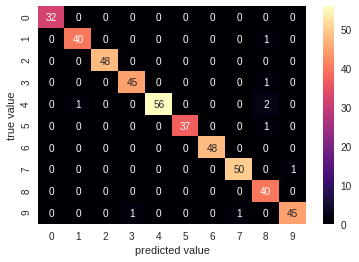

In [4]:
# support vector machine

from sklearn.svm import SVC

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

clf = SVC(kernel='linear')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print('Accuracy = ', metrics.accuracy_score(ypred, ytest)*100,'%')
sns.heatmap(metrics.confusion_matrix(ypred, ytest), annot=True,
           cmap=plt.cm.magma)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [5]:
# random forest

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print('Accuracy = ', metrics.accuracy_score(ypred, ytest)*100, '%')


Accuracy =  97.33333333333334 %


[[0.49656998]] [15.49473398]
0.9907865479246246


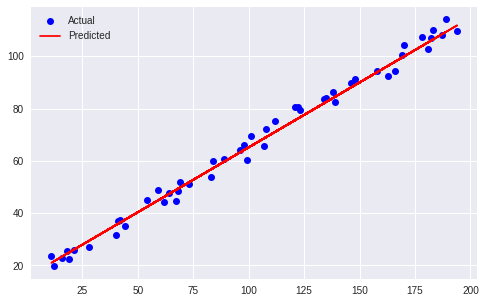

In [6]:
# linear regression

from sklearn.linear_model import LinearRegression

X = np.arange(200)
X = X[:, np.newaxis]
y = 0.5*X + 10
ynoise = np.random.rand(np.shape(y)[0], np.shape(y)[1])*10
y = y + ynoise

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

lm = LinearRegression()
lm.fit(Xtrain, ytrain)

ypred = lm.predict(Xtest)

print(lm.coef_, lm.intercept_)
print(lm.score(Xtest, ytest))

fig = plt.figure(figsize=(8,5))
plt.plot(Xtest, ytest, 'o', color='blue')
plt.plot(Xtest, ypred, color='red')
plt.legend(['Actual', 'Predicted']);

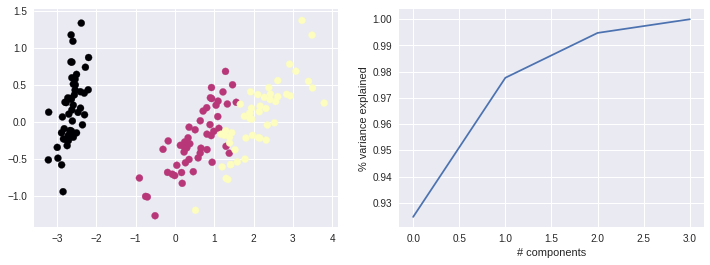

In [7]:
# PCA
from sklearn.decomposition import PCA

X, y = iris.data, iris.target
pca = PCA() # n_components = 0.95, n_components = 10
pca.fit(X)
X_reduced = pca.transform(X)

fig = plt.figure(figsize=(12,4))
fig.add_subplot(1,2,1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='magma');

# visualize % variance explained
fig.add_subplot(1,2,2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('% variance explained');

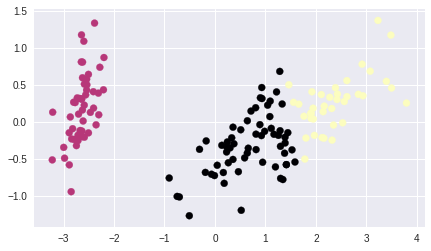

In [8]:
# k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)
ypred = kmeans.predict(X)

fig = plt.figure(figsize=(7,4))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=ypred, cmap='magma');

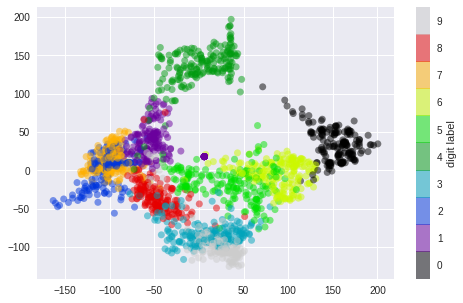

In [9]:
# Isomap

from sklearn.manifold import Isomap

imap = Isomap(n_components=2)
Xreduced = imap.fit_transform(digits.data)

fig = plt.figure(figsize=(8,5))
plt.scatter(Xreduced[:, 0], Xreduced[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [10]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score

# for logistic regression
cv_scores = cross_val_score(clf, digits.data, digits.target, cv=10)
print('Mean CV accuracy = ', np.mean(cv_scores)*100, '%')

Mean CV accuracy =  94.93871833987333 %


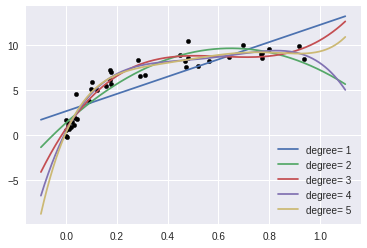

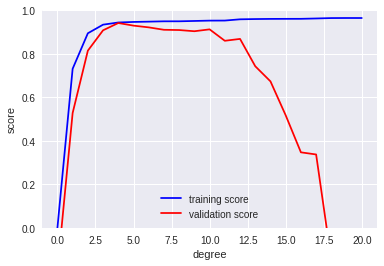

In [11]:
# validation curve

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

rdmdata = np.random.RandomState(1)
X= rdmdata.rand(40,1)**2
y = 10 - 1. / (X + 0.1)
y += 1.0*rdmdata.randn(X.shape[0],1)


X_test = np.linspace(-0.1, 1.1, 500)[:,None]

# plot xtest vs ytest
plt.scatter(X, y, 20,color='black')
axis = plt.axis()
for degree in np.arange(1,6):
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test, y_test, label='degree= ' + str(degree))
plt.legend(loc='best'); plt.show()

# plot validation curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=10)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.ylim(0,1)
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score');

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34]


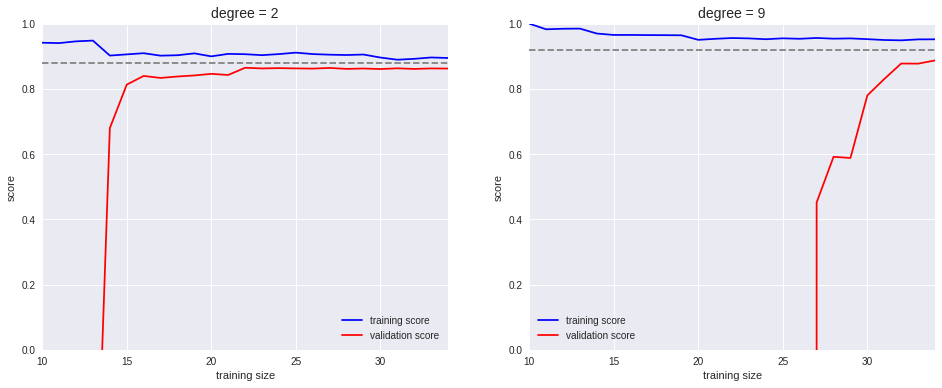

In [12]:
# learning curves

from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    print(N)
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [13]:
# grid search CV with pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import accuracy, f1_score
X = iris.data; y = iris.target
_, inds= np.where([(y==0) | (y==1)])
X = X[inds,:]
y = y[inds]

# option 1: Pipeline (define names explicitly)
pipe1 = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=2)),
        ('clf', SVC(kernel='linear', C=1))])

param_grid1 = dict(reduce_dims__n_components=[1,2,3],
                  clf__C=np.logspace(-4, 1, 6),
                  clf__kernel=['rbf','linear'])

# option 2: make_pipeline (auto-generates names)
pipe2 = make_pipeline(StandardScaler(),
                         PCA(n_components=2),
                        SVC(kernel='linear', C=1))

param_grid2 = dict(pca__n_components=[1,2,3],
                  svc__C=np.logspace(-4, 1, 6),
                  svc__kernel=['rbf','linear'])

grid = GridSearchCV(pipe1, param_grid=param_grid1, scoring=['accuracy', 'f1'], refit ='accuracy',
                    cv=3, n_jobs=1, verbose=0)
grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#print(grid.cv_results_)

1.0
{'clf__C': 0.0001, 'clf__kernel': 'rbf', 'reduce_dims__n_components': 1}
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dims', PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])


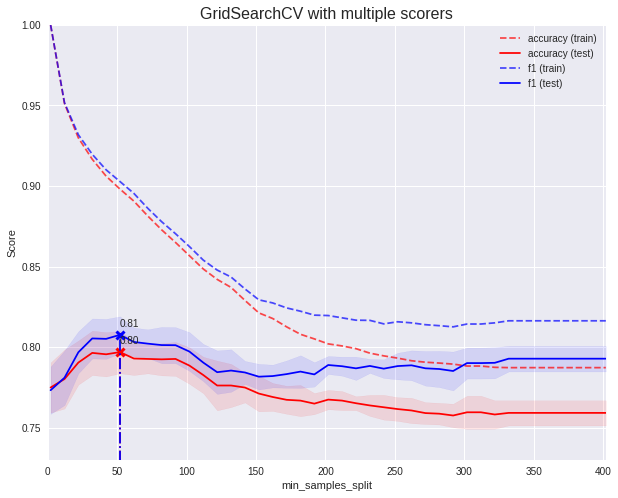

In [14]:
# another gridsearchCV example
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html

from sklearn.datasets import make_hastie_10_2
from sklearn.tree import DecisionTreeClassifier
X, y = make_hastie_10_2(n_samples=8000, random_state=42)

# run grid search
#scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring=['accuracy', 'f1'], cv=5, refit='accuracy', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_

# plot the results
plt.figure(figsize=(10, 8))
plt.title("GridSearchCV with multiple scorers", fontsize=16)
plt.xlabel("min_samples_split")
plt.ylabel("Score")
ax = plt.gca()

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(['accuracy', 'f1'], ['red', 'blue']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)
plt.legend(loc="best")
plt.show()

## Feature engineering

In [15]:
# categorical variables
# use one-hot encoding
# also see sklearn.preprocessing.OneHotEncoder and sklearn.feature_extraction.FeatureHasher 
data = [
    {'price': 1100000, 'rooms': 4, 'neighborhood': 'Annex'},
    {'price': 9500000, 'rooms': 5, 'neighborhood': 'Forest Hill'},
    {'price': 2200000, 'rooms': 3, 'neighborhood': 'High Park'},
    {'price': 10000000, 'rooms': 2, 'neighborhood': 'Forest Hill'}
]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)
vec.get_feature_names()

# spare format (most but not all estimators accept this)
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [16]:
# text

from sklearn.feature_extraction.text import CountVectorizer

myphrases = ['apple juice', 'apple pie', 'orange juice', 'cherry pie', 'apple cherry pie'] 

vec = CountVectorizer()
X = vec.fit_transform(myphrases)
df1 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df1)

# term frequency-inverse document frequency (TF–IDF): weights the word counts by a measure of how often they appear
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(myphrases)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df2)

   apple  cherry  juice  orange  pie
0      1       0      1       0    0
1      1       0      0       0    1
2      0       0      1       1    0
3      0       1      0       0    1
4      1       1      0       0    1
      apple    cherry     juice    orange       pie
0  0.638711  0.000000  0.769447  0.000000  0.000000
1  0.707107  0.000000  0.000000  0.000000  0.707107
2  0.000000  0.000000  0.627914  0.778283  0.000000
3  0.000000  0.769447  0.000000  0.000000  0.638711
4  0.538283  0.648463  0.000000  0.000000  0.538283


In [17]:
# image features
# see Scikit-Image project (https://scikit-image.org/)
# e.g. of Scikit-Learn and Scikit-Image together, see Feature Engineering: Working with Images.
# (https://render.githubusercontent.com/view/05.14-Image-Features.ipynb)

In [18]:
# imputation of missing data
from numpy import nan
X = np.array([[ nan, 2,   1  ],
              [ 2,   nan, 5  ],
              [ 4,   10,   nan  ]])


from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
Xnew = imp.fit_transform(X)
Xnew

/home/amandae/anaconda3/envs/nibeta/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 3.,  2.,  1.],
       [ 2.,  6.,  5.],
       [ 4., 10.,  3.]])

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.15, 0.85],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ]])

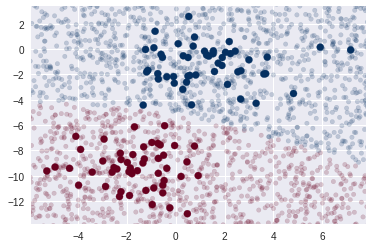

In [19]:
# Gaussian Naive Bayes

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState()
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.2)
plt.axis(lim)

yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

In [20]:
# Multinomial Naive Bayes

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

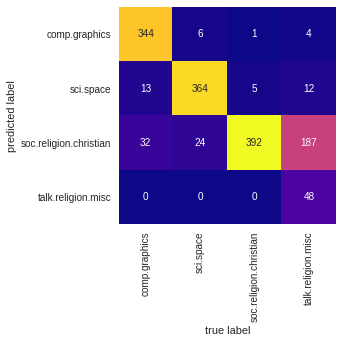

In [21]:
from sklearn.naive_bayes import MultinomialNB

categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)
mat = metrics.confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='plasma',
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [22]:
# return prediction for a string:

def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    print(train.target_names[pred[0]])
    # return train.target_names[pred[0]]

predict_category('sending a payload to the ISS')
predict_category('discussing islam vs atheism')
predict_category('determining the screen resolution')

sci.space
soc.religion.christian
comp.graphics


# Linear regression

In [23]:
# basis function regression

from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))


# Regularization
  

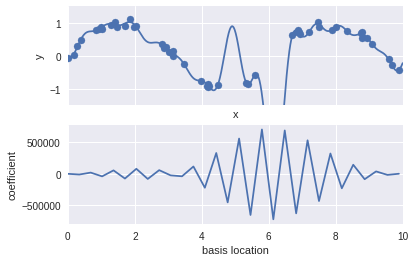

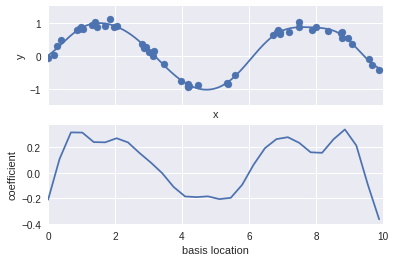

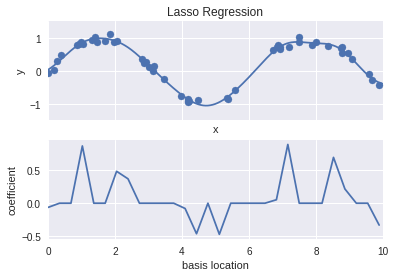

In [24]:
from sklearn.linear_model import Ridge, Lasso

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

xfit = np.linspace(0, 10, 1000)
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model)

model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')


error = [[0.00370037]]


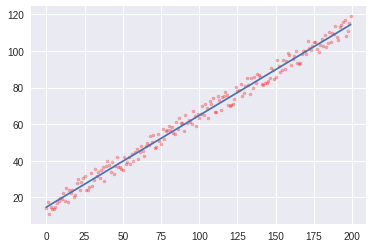

In [25]:
# bootstrap resampling 

from sklearn.utils import resample
np.random.seed(1)

X = np.arange(200)
X = X[:, np.newaxis]
y = 0.5*X + 10
ynoise = np.random.rand(np.shape(y)[0], np.shape(y)[1])*10
y = y + ynoise

model = LinearRegression()
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

ypred = model.predict(X)

plt.scatter(X,y,10,c='r',alpha=0.3)
plt.plot(X,ypred)
print('error = {}'.format(err))

# SVMs

In [26]:
from sklearn.svm import SVC

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

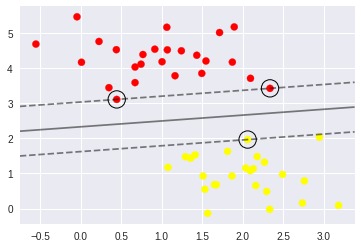

In [27]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='None', edgecolors='Black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

In [28]:
# Example: face recognition

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
from sklearn.decomposition import PCA

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 3min 26s, sys: 1min 43s, total: 5min 9s
Wall time: 1min
{'svc__C': 10, 'svc__gamma': 0.001}


                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



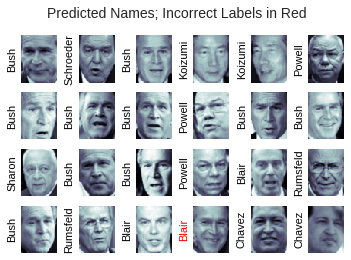

In [29]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

# classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

In [30]:
# Random forests

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)
model = RandomForestClassifier(n_estimators=100, random_state=0)

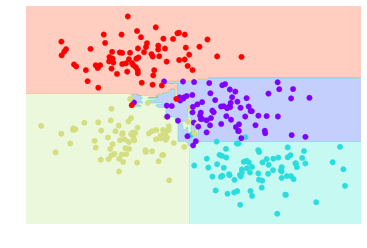

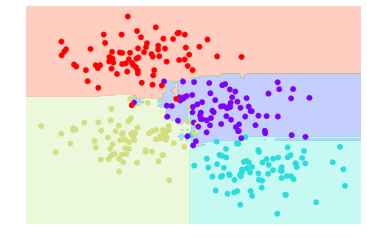

In [31]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
fig = plt.figure(); visualize_classifier(bag, X, y)
fig = plt.figure(); visualize_classifier(model, X, y)

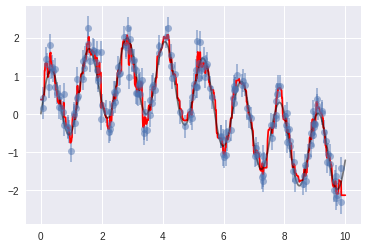

In [32]:
# random forest regression
# non-parametric random forest model is flexible enough to fit the multi-period data, without specifying a multi-period model

rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def makedata(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = makedata(x)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = makedata(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

# PCA

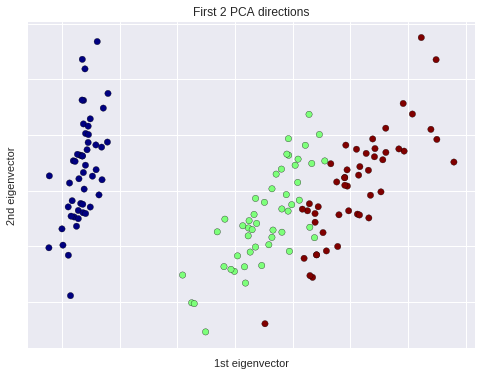

In [33]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

iris = load_iris()
X = iris.data
y = iris.target

X_reduced = PCA().fit_transform(iris.data) #PCA(n_components=2)

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(1,1,1)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.jet, edgecolor='k', s=40)
ax.set_title("First 2 PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_xticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.set_yticklabels([])
plt.show()

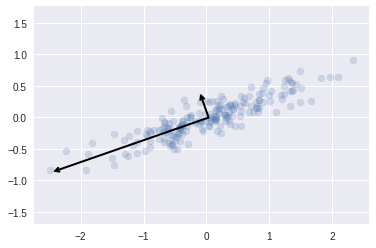

In [34]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components = 2, whiten=True)
# whiten: When True, components_ vectors are multiplied by the square root of 
# n_samples and then divided by the singular values to ensure 
# uncorrelated outputs with unit component-wise variances.
pca.fit(X)
pca.components_
pca.explained_variance_ratio_

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0,color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

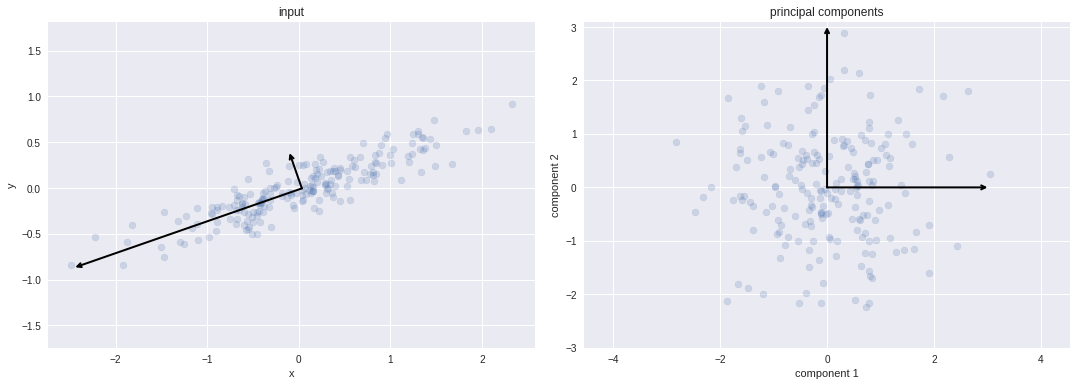

In [35]:
# pca rotation

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

plt.show()

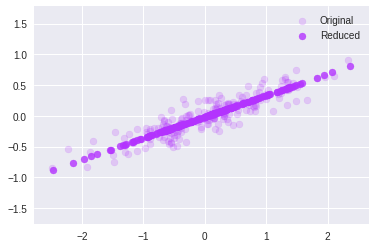

In [36]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], color=[.7,.2,1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], color=[.7,.2,1],alpha=0.8)
plt.axis('equal');
plt.legend(['Original', 'Reduced'])
plt.show()

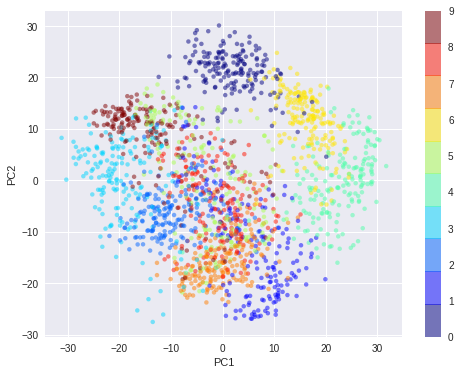

In [37]:
# pca for dataviz: digits

from sklearn.datasets import load_digits
digits = load_digits()
pca = PCA(2) # project data from 64 to 2 dimensions
pca.fit(digits.data) # could also just do pca.fit_transform
projected = pca.transform(digits.data)

projected2 = pca.fit_transform(digits.data)

fig = plt.figure(figsize=(8,6))

plt.scatter(projected2[:,0], projected2[:,1],s=20,c=digits.target, edgecolor='none',
           alpha=0.5, cmap=plt.cm.get_cmap('jet',10))
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.colorbar(); plt.show()

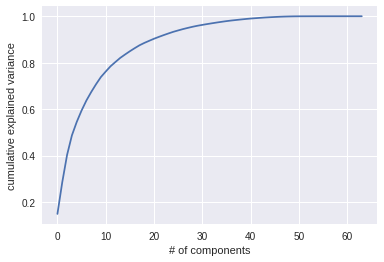

In [38]:
# cumulative variance
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('cumulative explained variance')
plt.show()

N components: 12


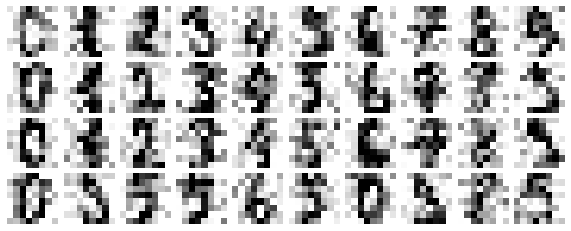

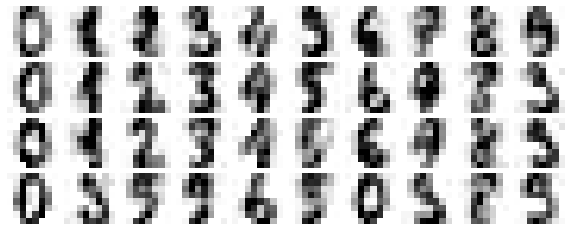

In [39]:
# PCA as noise filtering
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

# add noise:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

pca = PCA(0.50).fit(noisy) # can specifiy % variance to preserve instead of # PCs
print('N components: ' + str(pca.n_components_))

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

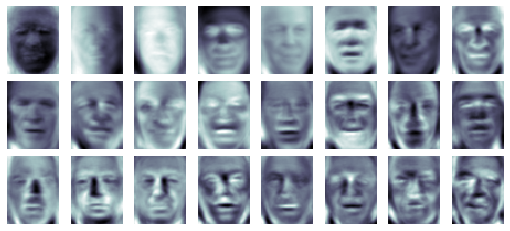

In [40]:
# eigenfaces

pca= PCA(150, svd_solver ='randomized')
pca.fit(faces.data)

fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

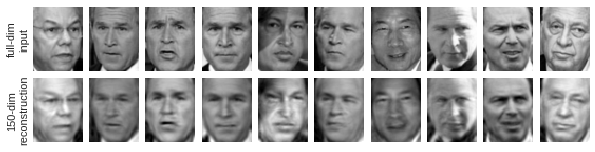

In [41]:
# reduce 3000 dimensions to 150!
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# Manifold learning

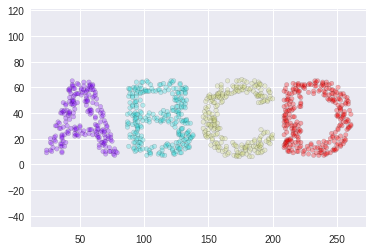

In [42]:
def make_manifold(N=1000):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'ABCD', va='center', ha='center', weight='bold', size=85)
    fig.savefig('manifold_img.png')
    plt.close(fig)
    
    from matplotlib.image import imread
    data = imread('manifold_img.png')[::-1, :, 0].T # 288 x 72
    a, b = np.where(data<1)
    inds = np.random.permutation(a.shape[0])
    inds = inds[0:N]
    newdata = np.array([a[inds],b[inds]]).T
    newdata = newdata[np.argsort(newdata[:,0])] # makes distance plots look prettier
    return newdata


X = make_manifold(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 4),alpha=.3)
plt.scatter(X[:, 0], X[:, 1], 20, **colorize, edgecolors='black',linewidth=.3)
plt.axis('equal');

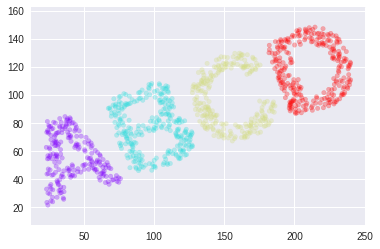

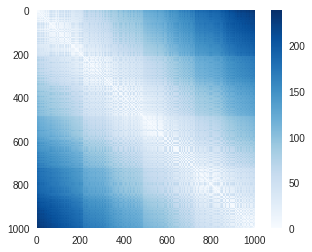

Are all distances the same for X and X2? True


In [43]:
# rotation
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], 20,**colorize)
plt.axis('equal'); plt.show()

# pairwise distances
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar(); plt.show()

D2 = pairwise_distances(X2)
print('Are all distances the same for X and X2? {}'.format(np.allclose(D,D2))) # np.allclose

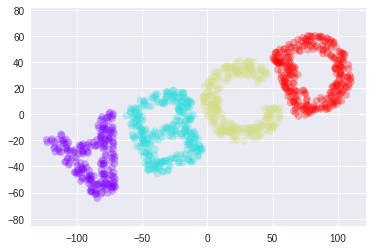

In [44]:
# multidimensional scaling
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=10)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

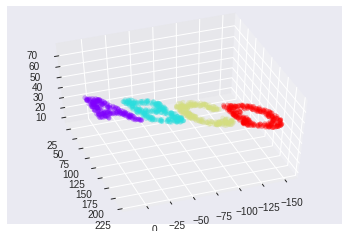

In [45]:
# MDS in 3D
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim=70, elev=50)

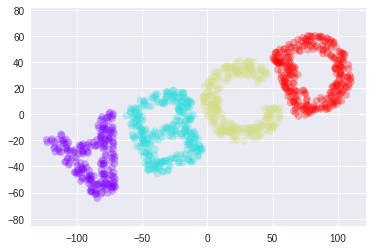

In [46]:
# input 3d data, get 2d rep
model = MDS(n_components=2, random_state=10)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

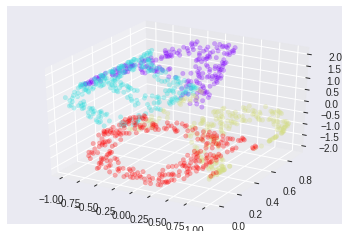

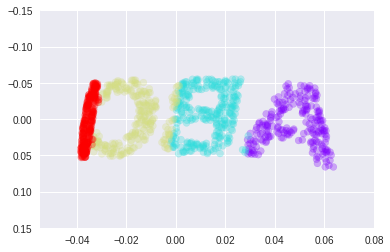

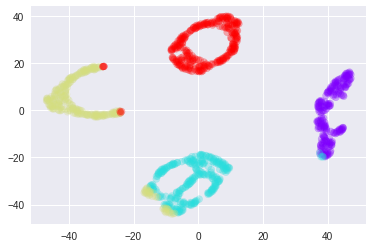

In [47]:
# nonlinear embeddings

def make_s_curve(X):
    X = (X - np.min(X))/np.max(X)*4 # want min to be 4
    #plt.scatter(X[:,0], X[:,1]); plt.show()
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

X = make_manifold(1000)
XS = make_s_curve(X)
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize);

# LLE
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

# TSNE
from sklearn.manifold import TSNE
model = TSNE(n_components=2, init='random')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)

# K-means clustering

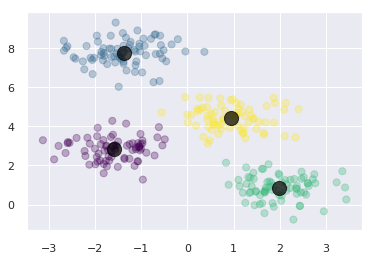

In [48]:
from sklearn.cluster import KMeans
sns.set()
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis',alpha=.3)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],c='black',s=200,alpha=.7)

# to find labels yourself
from sklearn.metrics import pairwise_distances_argmin
labels = pairwise_distances_argmin(X, centers)

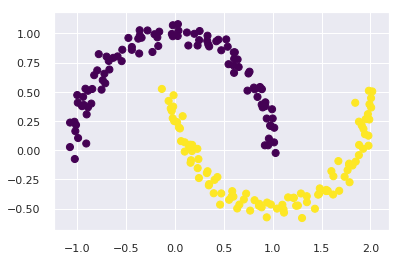

In [49]:
# spectral clustering
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=0.05, random_state=0)
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels,s=50,cmap='viridis'); 

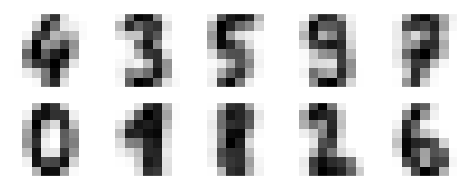

In [50]:
# kmeans on digits data

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

fig, ax = plt.subplots(2,5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8) # cluster centers are 10x64: 10 cluster, 64 pixels
for axi, center in zip(ax.flat, centers): # has trouble with 1 and 8
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

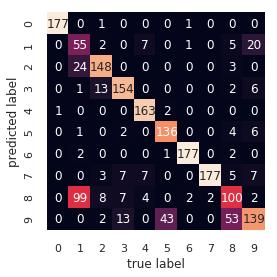

In [51]:
# check accuracy of clusters vs digits.target

# fix order of clusters to be 0-9 (labels might be permuted)
from scipy.stats import mode
labels = np.zeros(clusters.shape)
for i in range(10):
    mask = (clusters==i)
    labels[mask] = mode(digits.target[mask])[0]
    
# check accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_score(digits.target, labels)

# confusion matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, # need to transpose mat!
            xticklabels=digits.target_names, yticklabels = digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [52]:
# preprocess data using TSNE first

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permute labels
labels = np.zeros(clusters.shape)
for i in range(10):
    mask = (clusters==i)
    labels[mask] = mode(digits.target[mask])[0]
    
accuracy_score(digits.target, labels)


0.9326655537006121

(427, 640, 3)
(273280, 3)


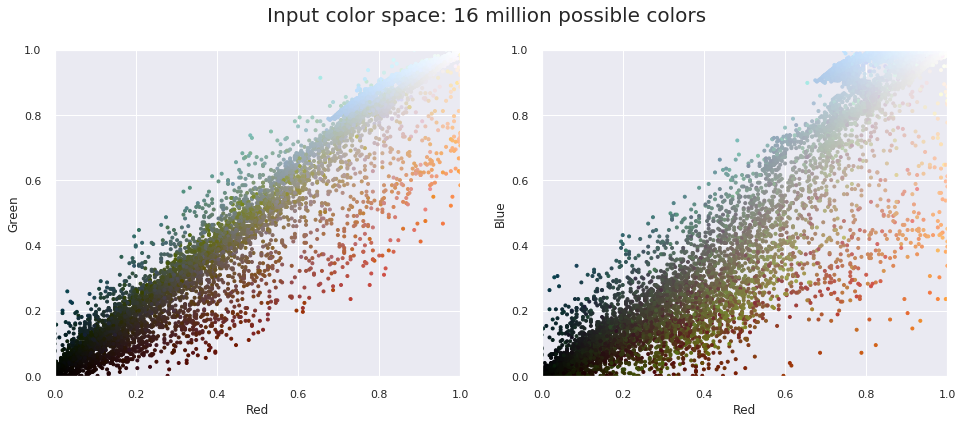

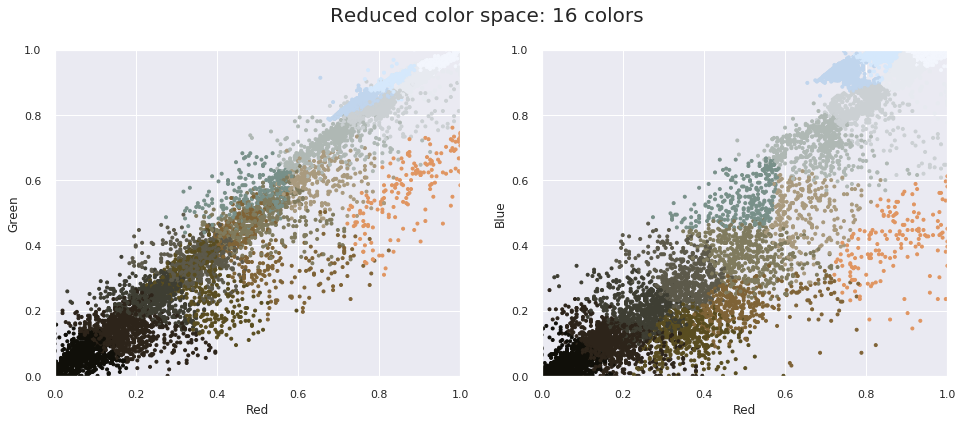

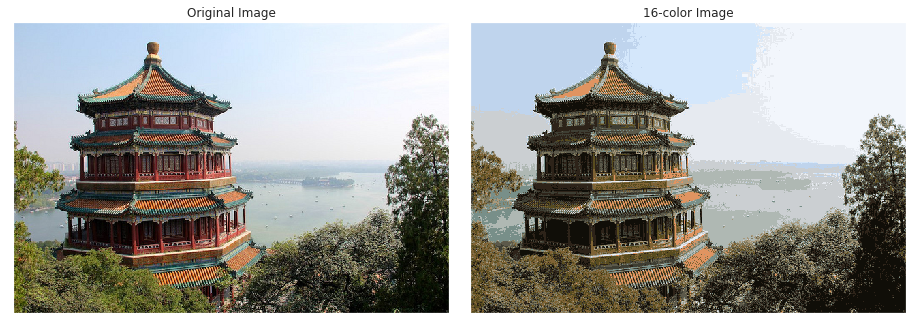

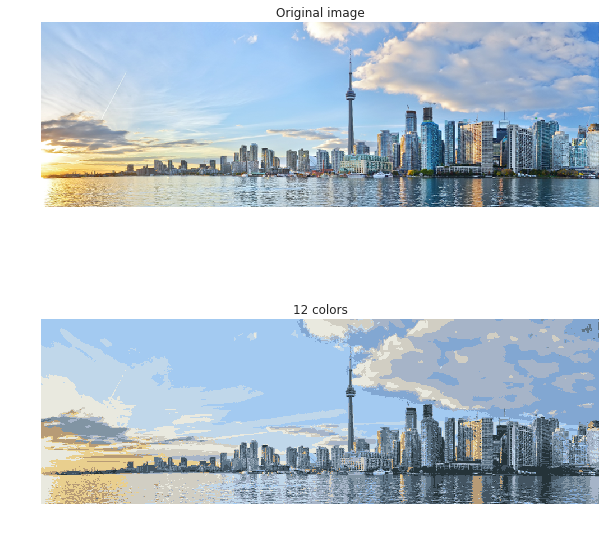

In [53]:
# k-means for color compression
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
# ax = plt.axes(xticks=[], yticks=[]); ax.imshow(china);
print(china.shape) # height, width, RGB (0-255)

data = china/255. # use 0-1 scale
data = data.reshape(china.shape[0]*china.shape[1],3)
print(data.shape)

# use only 10,000 pixels for efficiency
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
    fig.suptitle(title, size=20)
    
plot_pixels(data, title='Input color space: 16 million possible colors')

# reduce 16M colors to 16 using k-means clustering across the pixel space
# use mini-batch bc large dataset
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

# plot new image in image space
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1,2, figsize=(16,6), subplot_kw = dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china); ax[0].set_title('Original Image')
ax[1].imshow(china_recolored); ax[1].set_title('16-color Image');

# same thing for Toronto!
from matplotlib.image import imread
myimg = imread("toronto.png")
X = (myimg).reshape(-1, 3)
n_colors = 12
kmeans = MiniBatchKMeans(n_colors)
labels = kmeans.fit_predict(X)
colors = kmeans.cluster_centers_
new_image = colors[labels].reshape(myimg.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image

fig = plt.figure(figsize=(10,10))
fig.add_subplot(2,1,1)
plt.imshow(myimg)
plt.grid=False
plt.title('Original image'); plt.axis('off')

fig.add_subplot(2,1,2)
plt.imshow(new_image)
plt.title('{} colors'.format(n_colors)); plt.axis('off');

# Gaussian Mixture Models

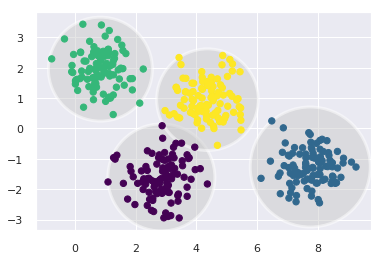

In [54]:
%matplotlib inline

# imports
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# make data 
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

# plot "hard cutoffs" for kmeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

[[0.    0.469 0.    0.531]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


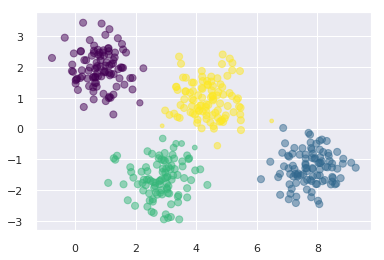

In [55]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)

# probability of belonging to each cluster
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

# make size of point proportional to certainty of prediction 
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size, alpha=.5);

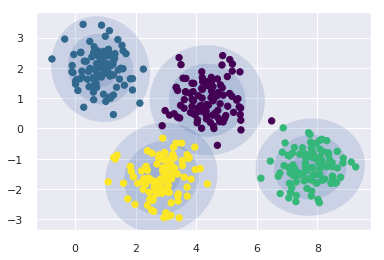

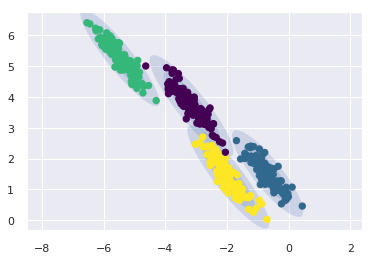

In [56]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        

gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X); plt.show()

# Xstretched
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched);plt.show()

128.95046046595797


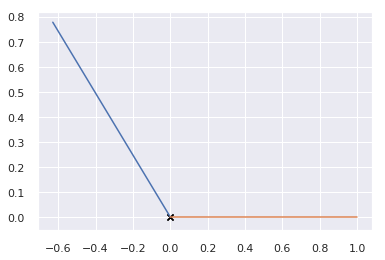

In [57]:
# visualize the angle that arctan2 is calculating
covariance = gmm.covariances_[0,:,:]
U, s, Vt = np.linalg.svd(covariance)
plt.plot([0,U[0,0]], [0,U[1,0]]) #[x1,x2],[y1,y2]
plt.plot([1,0],[0,0])
plt.scatter([0,0],[0,0],marker='x',color='black')
print(np.degrees(np.arctan2(U[1,0],U[0,0])))

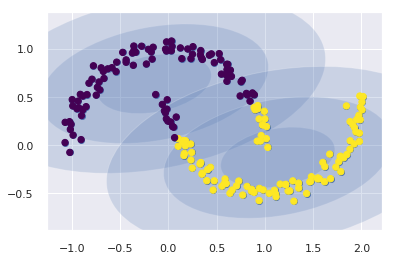

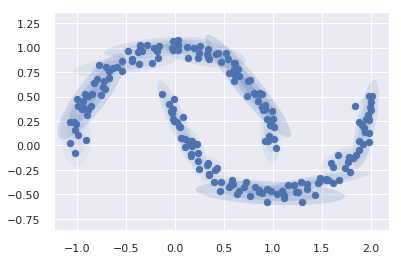

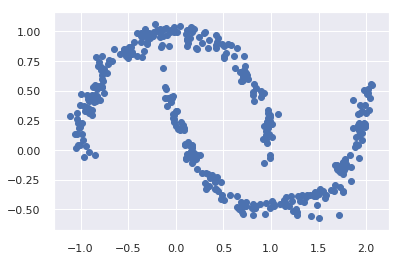

In [58]:
# GMM as density estimation
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

# make 2 clusters: not so useful
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon); plt.show()

# make 16: more useful 
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False); plt.show()

# generate new random data
Xnew = gmm16.sample(400)
Xnew = Xnew[0]
plt.scatter(Xnew[:, 0], Xnew[:, 1]);


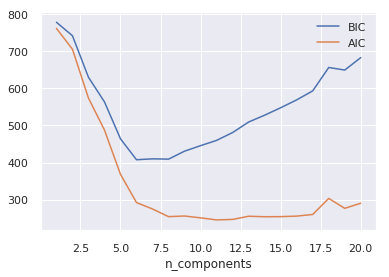

In [59]:
# choosing # of components with AIC and BIC
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

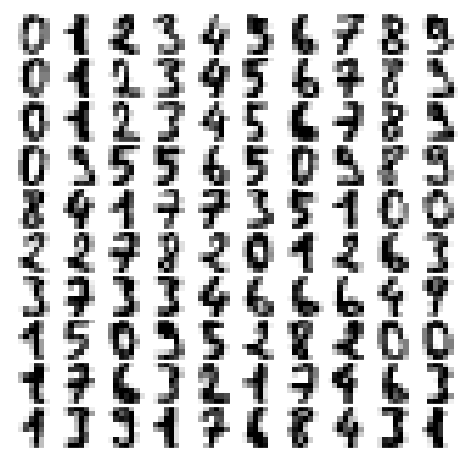

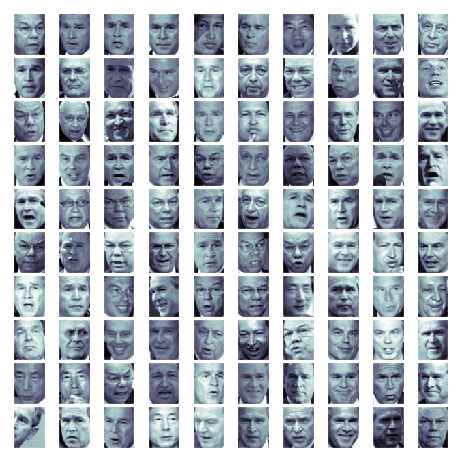

In [60]:
# generate new handwritten digits

from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

def plot_faces(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(62, 47), cmap='bone')
plot_faces(faces.data)


(1348, 40)


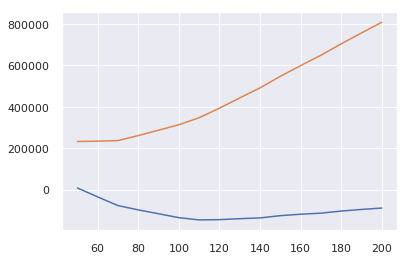

In [61]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(40, whiten=True) 
data = pca.fit_transform(faces.data)
print(data.shape)

# AIC
n_components = np.arange(50, 210, 10)
models = [GMM(n, covariance_type='full', random_state=0).fit(data)
          for n in n_components]
aics = [model.aic(data) for model in models]
bics = [model.bic(data) for model in models]
plt.plot(n_components, aics);
plt.plot(n_components, bics);


True


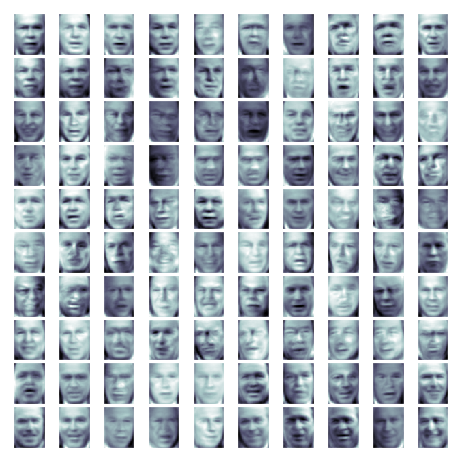

In [62]:
# generate new data

gmm = GMM(70, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_) # make sure the model converged

data_new = gmm.sample(100)[0]

data_transformed = pca.inverse_transform(data_new)
plot_faces(data_transformed)


# Kernel density estimation

(-0.02, 0.22)

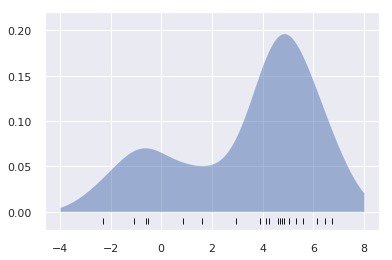

In [63]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(20)
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

In [64]:
# CV to choose bandwidth

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    param_grid={'bandwidth': bandwidths},
                    cv=LeaveOneOut()) # LeaveOneOut(len(x))
grid.fit(x[:, None]);
grid.best_params_ # choice of bandwidth which maximizes the score (default: log-likelihood)

{'bandwidth': 1.1233240329780276}

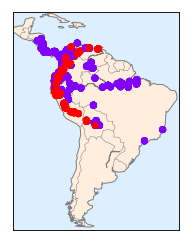

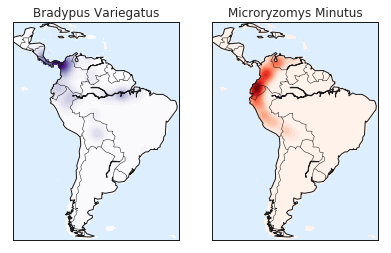

In [65]:
# KDE on a sphere

from sklearn.datasets import fetch_species_distributions
from mpl_toolkits.basemap import Basemap
from sklearn.datasets.species_distributions import construct_grids

data = fetch_species_distributions()

# Get matrices/arrays of species IDs and locations
latlon = np.vstack([data.train['dd lat'],
                    data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro')
                    for d in data.train['species']], dtype='int')


xgrid, ygrid = construct_grids(data)

# plot coastlines with basemap
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(),
            llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

# plot locations
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3,
          c=species, cmap='rainbow', latlon=True);

# plot KDE

# Set up the data grid for the contour plot
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

# Create two side-by-side plots
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']
cmaps = ['Purples', 'Reds']

for i, axi in enumerate(ax):
    axi.set_title(species_names[i])
    
    # plot coastlines with basemap
    m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                urcrnrlat=Y.max(), llcrnrlon=X.min(),
                urcrnrlon=X.max(), resolution='c', ax=axi)
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    m.drawcountries()
    
    # construct a spherical kernel density estimate of the distribution
    kde = KernelDensity(bandwidth=0.03, metric='haversine')
    kde.fit(np.radians(latlon[species == i]))

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999.0)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    axi.contourf(X, Y, Z, levels=levels, cmap=cmaps[i])

{'bandwidth': 7.054802310718643}
accuracy = 0.9666110183639399


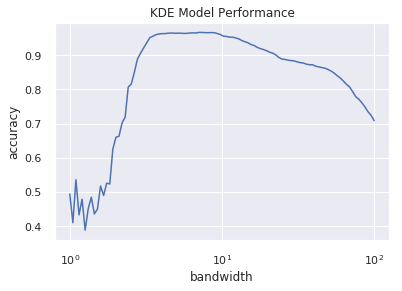

In [66]:
# "not-so-naive Bayes" (includes custom classifier)

from sklearn.base import BaseEstimator, ClassifierMixin

class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]
    
# use custom estimator on digits
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

digits = load_digits()
bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths})
grid.fit(digits.data, digits.target)
scores = grid.cv_results_['mean_test_score']

# plot results
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth'); plt.ylabel('accuracy')
plt.title('KDE Model Performance')
print(grid.best_params_)
print('accuracy =', grid.best_score_)


# Application: Face detection pipeline

0.9866305831193763
{'C': 4.0}


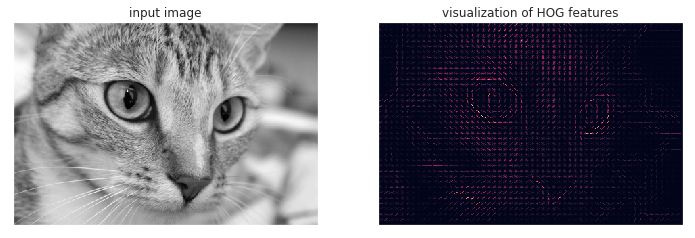

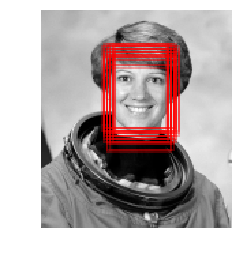

In [67]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualise=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

# 1) positive examples
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images

# 2) negative examples
# (aim: sufficiently cover the space of "non-faces" that algorithm is likely to see)

from skimage import data, transform
imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())
          for name in imgs_to_use]


from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])

# 3) Combine sets, extract HOG features
# (takes a while, because HOG features involve a nontrivial computation for each image)

from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,
                                    negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

# 4) Train an SVM

# linear SVM good choice for a high-D binary classification task
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

# take best estimator, train on full training set
model = grid.best_estimator_
model.fit(X_train, y_train)

# 5) Find faces in a new image

test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]

# sliding window to iterate over patches of image, make HOG features for each patch
def sliding_window(img, patch_size=positive_patches[0].shape,
                   istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])

# take HOG features, make prediction for each patch
labels = model.predict(patches_hog)

# plot patches on original image
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')
Ni, Nj = positive_patches[0].shape
indices = np.array(indices)
for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))
